In [73]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [74]:
words = open('names.txt', 'r').read().splitlines()


In [75]:
chars = sorted(list(set(''.join(words))))
stoi = {c:i+1 for i,c in enumerate(chars)}
stoi['.'] = 0
itos = {i:c for c,i in stoi.items()}


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [76]:
block_size = 10
X, Y = [], []

for word in words:
    context = [0] * block_size
    for ch in word + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join([itos[i] for i in context]), '---->', itos[ix])
        context = context[1:] + [ix] #crop and append

Y = torch.tensor(Y)
X = torch.tensor(X)
X.shape, Y.shape

(torch.Size([228146, 10]), torch.Size([228146]))

In [88]:
embedding_dim = 12
C = torch.randn((27, embedding_dim))
W1 = torch.randn((block_size*embedding_dim, 500))
b1 = torch.randn(500)
W2 = torch.randn((500, 27))
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]
loss = []




In [78]:
num_parameters = sum(p.nelement() for p in parameters)
print(f"Number of parameters: {num_parameters}")


Number of parameters: 74351


In [79]:
#emb = C[X]
#h = torch.tanh(emb.view(-1, block_size*2) @ W1 + b1)
#logits = h @ W2 + b2
#counts = logits.exp()
#prob = counts / counts.sum(1, keepdim=True)
#loss = prob[torch.arange(0,prob.shape[0]), Y].log().mean().neg()
#oss
#Should really use F.cross_entropy as such, faster and more stable by subtracting the max  
#loss = F.cross_entropy(logits, Y)
#loss


In [89]:
from tqdm import tqdm

# for pass
for p in parameters:
    p.requires_grad = True
    p.grad = None

batch_size = 64
print_every = 1000  # change this to print loss every x iterations
alphas = [0.01]
for alpha in alphas:
    # wrap range with tqdm for progress bar
    progress_bar = tqdm(range(1000000))
    for i in progress_bar:
        ix = torch.randint(0, X.shape[0], (batch_size,))
        print[X[ix].shape]
        emb = C[X[ix]]
        print(emb.shape)
        
        h = torch.tanh(emb.view(-1, block_size*embedding_dim) @ W1 + b1)
        logits = h @ W2 + b2
        loss.append(F.cross_entropy(logits, Y[ix])+0.001*(W1**2).mean()+0.001*(W2**2).mean())
        for p in parameters:
            p.grad = None
        loss[-1].backward()
        for p in parameters:
            p.data -= alpha * p.grad

        # print loss every x iterations
        if i % print_every == 0:
            # Update the progress bar with the last 3 losses and current alpha
            progress_bar.set_postfix({'last loss': loss[-1].data.numpy(), 'alpha': alpha})
            

  0%|          | 327/1000000 [00:00<10:02, 1658.88it/s, last loss=33.8243, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 686/1000000 [00:00<09:29, 1753.31it/s, last loss=33.8243, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 1041/1000000 [00:00<09:28, 1757.98it/s, last loss=8.317985, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 1396/1000000 [00:00<09:25, 1767.23it/s, last loss=8.317985, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 1763/1000000 [00:01<09:14, 1799.95it/s, last loss=8.317985, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 1943/1000000 [00:01<09:22, 1773.12it/s, last loss=6.2222033, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 2302/1000000 [00:01<09:21, 1775.66it/s, last loss=6.2222033, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 2666/1000000 [00:01<10:26, 1592.18it/s, last loss=6.2222033, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 3033/1000000 [00:01<09:44, 1705.16it/s, last loss=5.2637887, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 3404/1000000 [00:01<09:20, 1776.91it/s, last loss=5.2637887, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 3778/1000000 [00:02<09:06, 1824.02it/s, last loss=5.2637887, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 4146/1000000 [00:02<09:04, 1829.51it/s, last loss=4.3853984, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 4519/1000000 [00:02<08:59, 1844.45it/s, last loss=4.3853984, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  0%|          | 4889/1000000 [00:02<09:02, 1833.25it/s, last loss=4.3853984, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 5263/1000000 [00:02<08:57, 1849.53it/s, last loss=3.3297884, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 5637/1000000 [00:03<08:55, 1855.35it/s, last loss=3.3297884, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 6010/1000000 [00:03<08:58, 1846.81it/s, last loss=2.9520874, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 6385/1000000 [00:03<08:54, 1859.72it/s, last loss=2.9520874, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 6762/1000000 [00:03<08:51, 1869.42it/s, last loss=2.9520874, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 7139/1000000 [00:04<10:05, 1640.62it/s, last loss=2.8795507, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 7513/1000000 [00:04<09:28, 1746.48it/s, last loss=2.8795507, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 7889/1000000 [00:04<09:08, 1809.16it/s, last loss=2.8795507, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 8263/1000000 [00:04<08:59, 1837.37it/s, last loss=2.7148092, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 8448/1000000 [00:04<09:32, 1732.87it/s, last loss=2.7148092, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 8820/1000000 [00:05<09:13, 1789.98it/s, last loss=2.931608, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 9199/1000000 [00:05<08:58, 1838.88it/s, last loss=2.931608, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 9580/1000000 [00:05<08:50, 1866.92it/s, last loss=2.931608, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 9960/1000000 [00:05<08:46, 1879.02it/s, last loss=2.4098103, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 10338/1000000 [00:05<08:46, 1878.38it/s, last loss=2.4098103, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 10721/1000000 [00:05<08:44, 1885.30it/s, last loss=2.4098103, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 11100/1000000 [00:06<08:47, 1876.29it/s, last loss=2.6078198, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 11485/1000000 [00:06<08:43, 1888.77it/s, last loss=2.6078198, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 11870/1000000 [00:06<08:41, 1893.85it/s, last loss=2.669473, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|          | 12250/1000000 [00:06<09:50, 1671.87it/s, last loss=2.669473, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 12625/1000000 [00:06<09:18, 1767.21it/s, last loss=2.669473, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 12997/1000000 [00:07<09:04, 1812.45it/s, last loss=2.3181984, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 13370/1000000 [00:07<08:57, 1835.46it/s, last loss=2.3181984, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 13745/1000000 [00:07<08:52, 1853.62it/s, last loss=2.3181984, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 14117/1000000 [00:07<08:53, 1849.50it/s, last loss=2.4879487, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 14490/1000000 [00:08<08:57, 1832.88it/s, last loss=2.4879487, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  1%|▏         | 14863/1000000 [00:08<08:53, 1845.79it/s, last loss=2.4879487, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 15239/1000000 [00:08<09:44, 1686.01it/s, last loss=2.4721417, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 15609/1000000 [00:08<09:18, 1761.05it/s, last loss=2.4721417, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 15982/1000000 [00:08<09:03, 1810.60it/s, last loss=2.4721417, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 16353/1000000 [00:09<08:57, 1829.01it/s, last loss=2.8229043, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 16724/1000000 [00:09<08:54, 1840.84it/s, last loss=2.8229043, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 17096/1000000 [00:09<08:51, 1847.60it/s, last loss=2.7870674, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 17468/1000000 [00:09<08:51, 1848.45it/s, last loss=2.7870674, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 17653/1000000 [00:09<10:03, 1627.85it/s, last loss=2.7870674, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 18014/1000000 [00:10<09:33, 1711.93it/s, last loss=2.579338, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 18385/1000000 [00:10<09:11, 1778.86it/s, last loss=2.579338, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 18757/1000000 [00:10<09:00, 1816.81it/s, last loss=2.579338, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 19124/1000000 [00:10<08:58, 1822.80it/s, last loss=2.611837, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 19493/1000000 [00:10<09:02, 1808.64it/s, last loss=2.611837, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 19856/1000000 [00:11<10:12, 1599.66it/s, last loss=2.611837, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 20226/1000000 [00:11<09:29, 1721.01it/s, last loss=2.936994, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 20590/1000000 [00:11<09:14, 1767.05it/s, last loss=2.936994, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 20962/1000000 [00:11<09:00, 1811.68it/s, last loss=2.936994, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 21331/1000000 [00:11<08:56, 1824.39it/s, last loss=2.480073, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 21702/1000000 [00:12<08:52, 1838.50it/s, last loss=2.480073, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 22073/1000000 [00:12<08:52, 1836.86it/s, last loss=2.655766, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 22257/1000000 [00:12<10:04, 1616.20it/s, last loss=2.655766, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 22619/1000000 [00:12<09:36, 1695.40it/s, last loss=2.655766, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 22989/1000000 [00:12<09:12, 1769.12it/s, last loss=2.3075993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 23356/1000000 [00:13<09:02, 1800.95it/s, last loss=2.3075993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 23724/1000000 [00:13<09:37, 1691.45it/s, last loss=2.3075993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 24090/1000000 [00:13<09:16, 1754.91it/s, last loss=2.468308, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 24459/1000000 [00:13<09:02, 1797.46it/s, last loss=2.468308, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  2%|▏         | 24823/1000000 [00:13<09:04, 1789.78it/s, last loss=2.468308, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 25186/1000000 [00:14<09:02, 1798.48it/s, last loss=2.653975, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 25549/1000000 [00:14<09:50, 1651.13it/s, last loss=2.653975, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 25913/1000000 [00:14<09:22, 1732.94it/s, last loss=2.653975, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 26276/1000000 [00:14<09:10, 1770.30it/s, last loss=2.529029, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 26645/1000000 [00:14<09:00, 1802.23it/s, last loss=2.529029, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 27007/1000000 [00:15<09:00, 1800.39it/s, last loss=2.4679549, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 27191/1000000 [00:15<08:56, 1811.72it/s, last loss=2.4679549, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 27555/1000000 [00:15<09:50, 1646.02it/s, last loss=2.4679549, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 27918/1000000 [00:15<09:23, 1725.22it/s, last loss=2.3117743, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 28282/1000000 [00:15<09:08, 1770.41it/s, last loss=2.3117743, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 28644/1000000 [00:16<09:03, 1787.97it/s, last loss=2.3117743, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 29009/1000000 [00:16<08:58, 1804.58it/s, last loss=2.8670452, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 29367/1000000 [00:16<09:54, 1632.46it/s, last loss=2.8670452, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 29731/1000000 [00:16<09:23, 1722.27it/s, last loss=2.8670452, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 30093/1000000 [00:16<09:09, 1764.61it/s, last loss=2.4564652, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 30461/1000000 [00:17<08:58, 1800.23it/s, last loss=2.4564652, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 30824/1000000 [00:17<09:00, 1793.10it/s, last loss=2.4564652, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 31004/1000000 [00:17<10:07, 1594.64it/s, last loss=2.5263102, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 31359/1000000 [00:17<09:36, 1680.35it/s, last loss=2.5263102, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 31719/1000000 [00:17<09:17, 1736.03it/s, last loss=2.5263102, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 32082/1000000 [00:18<09:08, 1765.56it/s, last loss=3.037183, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 32445/1000000 [00:18<09:02, 1784.85it/s, last loss=3.037183, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 32810/1000000 [00:18<10:12, 1579.02it/s, last loss=3.037183, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 33170/1000000 [00:18<09:34, 1683.23it/s, last loss=2.308903, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 33528/1000000 [00:18<09:49, 1638.16it/s, last loss=2.308903, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 33892/1000000 [00:19<09:19, 1725.69it/s, last loss=2.308903, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 34250/1000000 [00:19<09:09, 1758.94it/s, last loss=2.0981455, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 34427/1000000 [00:19<10:14, 1571.13it/s, last loss=2.0981455, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  3%|▎         | 34787/1000000 [00:19<09:35, 1677.86it/s, last loss=2.0981455, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 35149/1000000 [00:19<09:15, 1737.61it/s, last loss=2.6048954, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 35526/1000000 [00:20<08:56, 1796.69it/s, last loss=2.6048954, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 35896/1000000 [00:20<10:05, 1591.42it/s, last loss=2.6048954, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 36258/1000000 [00:20<09:28, 1696.18it/s, last loss=2.7300394, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 36620/1000000 [00:20<09:10, 1750.37it/s, last loss=2.7300394, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 36982/1000000 [00:20<09:01, 1777.14it/s, last loss=2.4590783, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▎         | 37343/1000000 [00:21<08:57, 1789.67it/s, last loss=2.4590783, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 37523/1000000 [00:21<10:15, 1563.54it/s, last loss=2.4590783, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 37873/1000000 [00:21<09:43, 1648.50it/s, last loss=2.3844557, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 38235/1000000 [00:21<09:17, 1726.65it/s, last loss=2.3844557, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 38597/1000000 [00:21<09:06, 1758.58it/s, last loss=2.3844557, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 38963/1000000 [00:22<09:04, 1765.78it/s, last loss=2.3267915, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 39325/1000000 [00:22<08:58, 1783.02it/s, last loss=2.3267915, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 39690/1000000 [00:22<10:17, 1554.17it/s, last loss=2.3267915, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 40048/1000000 [00:22<09:37, 1663.47it/s, last loss=2.3314338, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 40408/1000000 [00:22<09:14, 1729.86it/s, last loss=2.3314338, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 40771/1000000 [00:23<09:02, 1769.58it/s, last loss=2.3314338, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 41133/1000000 [00:23<08:59, 1777.41it/s, last loss=2.291985, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 41491/1000000 [00:23<09:52, 1618.15it/s, last loss=2.291985, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 41852/1000000 [00:23<09:21, 1706.47it/s, last loss=2.291985, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 42212/1000000 [00:23<09:06, 1751.24it/s, last loss=2.4532068, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 42572/1000000 [00:24<08:59, 1774.91it/s, last loss=2.4532068, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 42752/1000000 [00:24<08:57, 1781.73it/s, last loss=2.4532068, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 43107/1000000 [00:24<09:53, 1612.91it/s, last loss=2.7073126, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 43467/1000000 [00:24<09:22, 1700.56it/s, last loss=2.7073126, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 43826/1000000 [00:24<09:08, 1743.54it/s, last loss=2.7073126, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 44192/1000000 [00:25<09:59, 1594.26it/s, last loss=2.5994213, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 44569/1000000 [00:25<09:11, 1733.92it/s, last loss=2.5994213, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  4%|▍         | 44934/1000000 [00:25<09:13, 1726.27it/s, last loss=2.5994213, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 45303/1000000 [00:25<08:53, 1790.01it/s, last loss=2.1680422, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 45489/1000000 [00:25<08:47, 1809.66it/s, last loss=2.1680422, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 45852/1000000 [00:26<09:33, 1665.03it/s, last loss=2.1680422, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 46227/1000000 [00:26<08:59, 1766.30it/s, last loss=2.5556912, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 46592/1000000 [00:26<08:51, 1793.16it/s, last loss=2.5556912, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 46962/1000000 [00:26<09:48, 1619.72it/s, last loss=2.569745, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 47320/1000000 [00:26<09:20, 1698.24it/s, last loss=2.569745, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 47689/1000000 [00:27<08:59, 1766.59it/s, last loss=2.569745, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 48056/1000000 [00:27<08:48, 1799.81it/s, last loss=2.637851, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 48244/1000000 [00:27<08:42, 1820.82it/s, last loss=2.637851, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 48608/1000000 [00:27<09:36, 1649.18it/s, last loss=2.637851, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 48984/1000000 [00:27<09:01, 1756.21it/s, last loss=2.3531358, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 49359/1000000 [00:28<08:45, 1809.95it/s, last loss=2.3531358, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▍         | 49737/1000000 [00:28<09:42, 1631.51it/s, last loss=2.3531358, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 50102/1000000 [00:28<09:12, 1718.77it/s, last loss=2.3514574, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 50468/1000000 [00:28<09:56, 1592.62it/s, last loss=2.3514574, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 50838/1000000 [00:29<09:13, 1714.41it/s, last loss=2.3514574, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 51013/1000000 [00:29<10:18, 1533.65it/s, last loss=2.48212, alpha=0.01]  

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 51382/1000000 [00:29<09:24, 1679.24it/s, last loss=2.48212, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 51757/1000000 [00:29<08:55, 1770.73it/s, last loss=2.48212, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 52126/1000000 [00:29<09:58, 1584.76it/s, last loss=2.4486094, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 52497/1000000 [00:30<09:12, 1713.84it/s, last loss=2.4486094, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 52870/1000000 [00:30<08:50, 1786.11it/s, last loss=2.4486094, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 53242/1000000 [00:30<08:39, 1821.78it/s, last loss=2.2137187, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 53426/1000000 [00:30<09:46, 1613.62it/s, last loss=2.2137187, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 53803/1000000 [00:30<09:03, 1739.76it/s, last loss=2.2137187, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 54178/1000000 [00:30<09:24, 1674.29it/s, last loss=2.114057, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 54545/1000000 [00:31<10:08, 1553.12it/s, last loss=2.114057, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  5%|▌         | 54914/1000000 [00:31<09:20, 1687.37it/s, last loss=2.114057, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 55285/1000000 [00:31<08:53, 1771.89it/s, last loss=2.775378, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 55653/1000000 [00:31<08:43, 1802.71it/s, last loss=2.775378, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 55835/1000000 [00:31<09:47, 1606.54it/s, last loss=2.775378, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 56201/1000000 [00:32<09:10, 1713.28it/s, last loss=2.4514472, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 56575/1000000 [00:32<08:48, 1784.69it/s, last loss=2.4514472, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 56952/1000000 [00:32<09:39, 1626.77it/s, last loss=2.640479, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 57318/1000000 [00:32<09:07, 1722.10it/s, last loss=2.640479, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 57687/1000000 [00:33<08:49, 1780.90it/s, last loss=2.640479, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 58055/1000000 [00:33<08:44, 1797.06it/s, last loss=2.4541373, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 58236/1000000 [00:33<09:58, 1573.22it/s, last loss=2.4541373, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 58605/1000000 [00:33<09:14, 1698.40it/s, last loss=2.4541373, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 58981/1000000 [00:33<08:48, 1780.48it/s, last loss=2.6057265, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 59360/1000000 [00:33<08:33, 1833.10it/s, last loss=2.6057265, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 59738/1000000 [00:34<08:32, 1833.52it/s, last loss=2.6057265, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 60118/1000000 [00:34<09:35, 1633.66it/s, last loss=2.357563, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 60491/1000000 [00:34<08:58, 1743.48it/s, last loss=2.357563, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 60862/1000000 [00:34<08:42, 1797.57it/s, last loss=2.357563, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 61229/1000000 [00:35<09:42, 1610.94it/s, last loss=2.6409767, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 61595/1000000 [00:35<09:07, 1713.14it/s, last loss=2.6409767, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 61963/1000000 [00:35<08:48, 1774.52it/s, last loss=2.6409767, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▌         | 62143/1000000 [00:35<10:44, 1455.56it/s, last loss=2.6963286, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 62513/1000000 [00:35<09:34, 1632.04it/s, last loss=2.6963286, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 62880/1000000 [00:36<09:01, 1729.35it/s, last loss=2.6963286, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 63058/1000000 [00:36<08:58, 1740.21it/s, last loss=2.4218214, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 63612/1000000 [00:36<09:03, 1722.75it/s, last loss=2.4218214, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 63980/1000000 [00:36<08:45, 1782.55it/s, last loss=2.4218214, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 64359/1000000 [00:36<08:28, 1840.42it/s, last loss=2.405438, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 64545/1000000 [00:37<09:35, 1626.04it/s, last loss=2.405438, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  6%|▋         | 64897/1000000 [00:37<09:13, 1690.93it/s, last loss=2.4775488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 65264/1000000 [00:37<08:51, 1757.17it/s, last loss=2.4775488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 65633/1000000 [00:37<09:47, 1591.12it/s, last loss=2.4775488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 65998/1000000 [00:37<09:08, 1702.38it/s, last loss=2.5326488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 66364/1000000 [00:38<08:49, 1764.18it/s, last loss=2.5326488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 66549/1000000 [00:38<08:42, 1786.87it/s, last loss=2.5326488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 66913/1000000 [00:38<09:28, 1640.87it/s, last loss=2.4435265, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 67274/1000000 [00:38<09:02, 1720.65it/s, last loss=2.4435265, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 67638/1000000 [00:38<09:55, 1566.82it/s, last loss=2.4435265, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 68003/1000000 [00:39<09:11, 1689.22it/s, last loss=2.551196, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 68379/1000000 [00:39<08:43, 1780.05it/s, last loss=2.551196, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 68562/1000000 [00:39<08:40, 1790.85it/s, last loss=2.551196, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 68922/1000000 [00:39<09:30, 1630.75it/s, last loss=2.5330207, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 69281/1000000 [00:39<09:42, 1597.35it/s, last loss=2.5330207, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 69637/1000000 [00:40<10:16, 1508.46it/s, last loss=2.5330207, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 70007/1000000 [00:40<09:17, 1668.14it/s, last loss=2.4921527, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 70381/1000000 [00:40<08:47, 1762.35it/s, last loss=2.4921527, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 70564/1000000 [00:40<08:42, 1780.45it/s, last loss=2.4921527, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 70925/1000000 [00:40<09:30, 1627.71it/s, last loss=2.8901336, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 71284/1000000 [00:41<09:05, 1703.28it/s, last loss=2.8901336, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 71654/1000000 [00:41<09:50, 1572.26it/s, last loss=2.8901336, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 72015/1000000 [00:41<09:13, 1677.19it/s, last loss=2.73171, alpha=0.01]  

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 72379/1000000 [00:41<08:51, 1745.81it/s, last loss=2.73171, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 72742/1000000 [00:41<09:39, 1601.12it/s, last loss=2.73171, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 73102/1000000 [00:42<09:07, 1691.74it/s, last loss=2.6602488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 73471/1000000 [00:42<08:44, 1766.73it/s, last loss=2.6602488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 73655/1000000 [00:42<08:38, 1787.31it/s, last loss=2.6602488, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 74018/1000000 [00:42<09:32, 1616.86it/s, last loss=2.3874815, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 74389/1000000 [00:42<08:55, 1728.52it/s, last loss=2.3874815, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  7%|▋         | 74753/1000000 [00:43<09:48, 1571.03it/s, last loss=2.3874815, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 75116/1000000 [00:43<09:08, 1684.81it/s, last loss=2.2609239, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 75487/1000000 [00:43<08:43, 1766.57it/s, last loss=2.2609239, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 75666/1000000 [00:43<09:49, 1568.07it/s, last loss=2.2609239, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 76012/1000000 [00:43<09:41, 1588.35it/s, last loss=2.2883117, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 76364/1000000 [00:44<10:19, 1490.33it/s, last loss=2.2883117, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 76732/1000000 [00:44<09:18, 1651.66it/s, last loss=2.2883117, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 77098/1000000 [00:44<08:51, 1737.93it/s, last loss=2.76238, alpha=0.01]  

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 77275/1000000 [00:44<10:00, 1535.45it/s, last loss=2.76238, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 77629/1000000 [00:44<09:21, 1643.38it/s, last loss=2.76238, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 77981/1000000 [00:45<10:05, 1522.32it/s, last loss=2.2164211, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 78342/1000000 [00:45<09:16, 1655.04it/s, last loss=2.2164211, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 78709/1000000 [00:45<08:48, 1741.77it/s, last loss=2.2164211, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 78886/1000000 [00:45<09:53, 1551.84it/s, last loss=2.2518287, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 79242/1000000 [00:45<09:14, 1659.58it/s, last loss=2.2518287, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 79609/1000000 [00:46<09:59, 1534.19it/s, last loss=2.2518287, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 79976/1000000 [00:46<09:10, 1671.29it/s, last loss=2.2385833, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 80333/1000000 [00:46<08:53, 1725.00it/s, last loss=2.2385833, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 80692/1000000 [00:46<09:27, 1620.94it/s, last loss=2.2385833, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 81061/1000000 [00:46<08:52, 1726.25it/s, last loss=2.2236943, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 81244/1000000 [00:47<08:43, 1755.22it/s, last loss=2.2236943, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 81592/1000000 [00:47<10:05, 1518.03it/s, last loss=2.2236943, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 81958/1000000 [00:47<09:11, 1664.00it/s, last loss=2.509042, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 82130/1000000 [00:47<10:18, 1482.95it/s, last loss=2.509042, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 82495/1000000 [00:47<09:19, 1639.23it/s, last loss=2.509042, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 82862/1000000 [00:48<08:50, 1727.23it/s, last loss=2.2432024, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 83233/1000000 [00:48<08:33, 1785.36it/s, last loss=2.2432024, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 83610/1000000 [00:48<09:38, 1582.95it/s, last loss=2.2432024, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 83968/1000000 [00:48<09:05, 1679.65it/s, last loss=2.3787632, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 84334/1000000 [00:48<08:42, 1754.01it/s, last loss=2.3787632, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 84512/1000000 [00:49<09:54, 1539.63it/s, last loss=2.3787632, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  8%|▊         | 84872/1000000 [00:49<09:10, 1661.56it/s, last loss=2.1527479, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 85238/1000000 [00:49<08:47, 1735.06it/s, last loss=2.1527479, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 85805/1000000 [00:49<08:18, 1832.68it/s, last loss=2.1527479, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 85990/1000000 [00:49<09:34, 1590.19it/s, last loss=2.5638936, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 86348/1000000 [00:50<09:02, 1684.12it/s, last loss=2.5638936, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 86704/1000000 [00:50<09:56, 1531.99it/s, last loss=2.5638936, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 87069/1000000 [00:50<09:06, 1670.14it/s, last loss=2.4054313, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▊         | 87456/1000000 [00:50<08:27, 1797.66it/s, last loss=2.4054313, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 87639/1000000 [00:50<09:25, 1612.42it/s, last loss=2.4054313, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 88024/1000000 [00:51<08:37, 1760.93it/s, last loss=2.4666922, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 88410/1000000 [00:51<08:15, 1841.05it/s, last loss=2.4666922, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 88788/1000000 [00:51<08:56, 1698.83it/s, last loss=2.4666922, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 89172/1000000 [00:51<08:25, 1803.39it/s, last loss=2.4283159, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 89356/1000000 [00:51<11:21, 1336.85it/s, last loss=2.4283159, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 89693/1000000 [00:52<10:41, 1418.75it/s, last loss=2.4283159, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 90057/1000000 [00:52<09:30, 1596.16it/s, last loss=2.4133358, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 90427/1000000 [00:52<08:50, 1714.10it/s, last loss=2.4133358, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 90795/1000000 [00:52<08:31, 1776.15it/s, last loss=2.4133358, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 91161/1000000 [00:53<08:25, 1799.27it/s, last loss=2.5046554, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 91527/1000000 [00:53<09:25, 1605.10it/s, last loss=2.5046554, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 91889/1000000 [00:53<08:53, 1700.62it/s, last loss=2.5046554, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 92254/1000000 [00:53<08:35, 1760.62it/s, last loss=2.3107312, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 92617/1000000 [00:53<09:34, 1580.38it/s, last loss=2.3107312, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 92984/1000000 [00:54<08:53, 1699.52it/s, last loss=2.8838615, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 93348/1000000 [00:54<08:36, 1756.06it/s, last loss=2.8838615, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 93715/1000000 [00:54<08:25, 1792.73it/s, last loss=2.8838615, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 94080/1000000 [00:54<08:21, 1808.08it/s, last loss=2.396353, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 94447/1000000 [00:54<08:18, 1817.35it/s, last loss=2.396353, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 94813/1000000 [00:55<08:16, 1822.44it/s, last loss=2.396353, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


  9%|▉         | 94996/1000000 [00:55<09:20, 1615.68it/s, last loss=2.3540013, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 95359/1000000 [00:55<08:49, 1710.01it/s, last loss=2.3540013, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 95723/1000000 [00:55<08:32, 1763.19it/s, last loss=2.3540013, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 96083/1000000 [00:55<09:10, 1641.27it/s, last loss=2.3181314, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 96448/1000000 [00:56<08:42, 1730.01it/s, last loss=2.3181314, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 96804/1000000 [00:56<09:16, 1623.57it/s, last loss=2.3181314, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 97171/1000000 [00:56<08:43, 1723.82it/s, last loss=2.333636, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 97354/1000000 [00:56<08:34, 1752.90it/s, last loss=2.333636, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 97709/1000000 [00:56<09:36, 1565.71it/s, last loss=2.333636, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 98070/1000000 [00:57<08:56, 1679.67it/s, last loss=2.3309424, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 98435/1000000 [00:57<08:34, 1751.22it/s, last loss=2.3309424, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 98807/1000000 [00:57<08:20, 1802.12it/s, last loss=2.3309424, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 99171/1000000 [00:57<08:17, 1809.10it/s, last loss=2.167904, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 99537/1000000 [00:57<08:15, 1816.89it/s, last loss=2.167904, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|▉         | 99895/1000000 [00:58<09:02, 1659.45it/s, last loss=2.167904, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 100259/1000000 [00:58<08:37, 1737.37it/s, last loss=2.2436788, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 100623/1000000 [00:58<08:26, 1776.85it/s, last loss=2.2436788, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 100802/1000000 [00:58<09:29, 1579.17it/s, last loss=2.2436788, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 101163/1000000 [00:58<08:53, 1684.44it/s, last loss=2.4247572, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 101530/1000000 [00:59<08:31, 1756.07it/s, last loss=2.4247572, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 101891/1000000 [00:59<09:06, 1643.18it/s, last loss=2.4247572, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 102255/1000000 [00:59<08:39, 1728.54it/s, last loss=2.3209186, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 102620/1000000 [00:59<08:26, 1773.10it/s, last loss=2.3209186, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 102986/1000000 [00:59<08:18, 1798.21it/s, last loss=2.6568823, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 103348/1000000 [01:00<09:19, 1602.46it/s, last loss=2.6568823, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 103712/1000000 [01:00<08:46, 1703.55it/s, last loss=2.6568823, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 104076/1000000 [01:00<08:29, 1758.11it/s, last loss=2.4629722, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 104254/1000000 [01:00<09:28, 1576.14it/s, last loss=2.4629722, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 104618/1000000 [01:00<08:49, 1691.17it/s, last loss=2.4629722, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 10%|█         | 104985/1000000 [01:01<08:28, 1761.15it/s, last loss=2.500935, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 105344/1000000 [01:01<09:07, 1635.01it/s, last loss=2.500935, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 105701/1000000 [01:01<08:45, 1702.50it/s, last loss=2.500935, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 105884/1000000 [01:01<08:34, 1737.81it/s, last loss=2.9232602, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 106244/1000000 [01:01<09:09, 1627.86it/s, last loss=2.9232602, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 106610/1000000 [01:02<08:38, 1723.84it/s, last loss=2.9232602, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 106980/1000000 [01:02<08:20, 1784.77it/s, last loss=2.2095587, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 107347/1000000 [01:02<08:13, 1808.69it/s, last loss=2.2095587, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 107712/1000000 [01:02<08:13, 1809.27it/s, last loss=2.2095587, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 108074/1000000 [01:02<08:59, 1653.05it/s, last loss=2.4793866, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 108431/1000000 [01:03<09:29, 1566.04it/s, last loss=2.4793866, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 108789/1000000 [01:03<08:52, 1672.61it/s, last loss=2.4793866, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 108972/1000000 [01:03<08:39, 1715.39it/s, last loss=2.5305803, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 109327/1000000 [01:03<09:13, 1608.33it/s, last loss=2.5305803, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 109684/1000000 [01:03<09:42, 1529.21it/s, last loss=2.5305803, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 110046/1000000 [01:04<08:55, 1661.93it/s, last loss=2.5758564, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 110412/1000000 [01:04<08:30, 1742.43it/s, last loss=2.5758564, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 110778/1000000 [01:04<08:18, 1783.81it/s, last loss=2.5758564, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 111143/1000000 [01:04<08:15, 1794.03it/s, last loss=2.336632, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 111512/1000000 [01:04<08:08, 1819.87it/s, last loss=2.336632, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 111878/1000000 [01:05<08:08, 1819.09it/s, last loss=2.336632, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█         | 112243/1000000 [01:05<09:06, 1624.38it/s, last loss=2.5326912, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 112608/1000000 [01:05<08:36, 1718.95it/s, last loss=2.5326912, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 112792/1000000 [01:05<08:26, 1751.62it/s, last loss=2.5326912, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 113152/1000000 [01:05<09:00, 1640.39it/s, last loss=2.237126, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 113508/1000000 [01:06<09:35, 1540.61it/s, last loss=2.237126, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 113882/1000000 [01:06<08:41, 1698.25it/s, last loss=2.237126, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 114227/1000000 [01:06<09:12, 1602.83it/s, last loss=2.284234, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 114590/1000000 [01:06<08:41, 1699.04it/s, last loss=2.284234, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 11%|█▏        | 114954/1000000 [01:07<08:23, 1759.52it/s, last loss=2.284234, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 115132/1000000 [01:07<09:11, 1605.27it/s, last loss=2.1881125, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 115494/1000000 [01:07<08:40, 1699.54it/s, last loss=2.1881125, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 115854/1000000 [01:07<09:27, 1557.28it/s, last loss=2.1881125, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 116216/1000000 [01:07<08:46, 1677.05it/s, last loss=2.4615843, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 116581/1000000 [01:07<08:25, 1748.14it/s, last loss=2.4615843, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 116939/1000000 [01:08<08:58, 1639.79it/s, last loss=2.4615843, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 117302/1000000 [01:08<08:31, 1724.62it/s, last loss=2.5135055, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 117477/1000000 [01:08<09:24, 1563.18it/s, last loss=2.5135055, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 117839/1000000 [01:08<08:45, 1678.30it/s, last loss=2.5135055, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 118190/1000000 [01:08<09:29, 1549.65it/s, last loss=2.524272, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 118555/1000000 [01:09<08:44, 1681.02it/s, last loss=2.524272, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 118921/1000000 [01:09<08:22, 1752.94it/s, last loss=2.524272, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 119286/1000000 [01:09<08:12, 1787.68it/s, last loss=2.658263, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 119645/1000000 [01:09<08:17, 1770.76it/s, last loss=2.658263, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 120006/1000000 [01:10<09:15, 1584.83it/s, last loss=2.4951966, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 120367/1000000 [01:10<08:40, 1689.32it/s, last loss=2.4951966, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 120732/1000000 [01:10<08:21, 1754.96it/s, last loss=2.4951966, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 121094/1000000 [01:10<08:13, 1779.64it/s, last loss=2.2066975, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 121457/1000000 [01:10<08:09, 1795.43it/s, last loss=2.2066975, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 121637/1000000 [01:10<09:09, 1597.99it/s, last loss=2.2066975, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 122001/1000000 [01:11<08:35, 1703.78it/s, last loss=2.3323348, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 122360/1000000 [01:11<08:22, 1745.63it/s, last loss=2.3323348, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 122724/1000000 [01:11<08:12, 1781.39it/s, last loss=2.3323348, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 123086/1000000 [01:11<08:09, 1790.85it/s, last loss=2.5410163, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 123447/1000000 [01:12<08:51, 1648.65it/s, last loss=2.5410163, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 123813/1000000 [01:12<08:24, 1735.64it/s, last loss=2.5410163, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 124177/1000000 [01:12<08:13, 1774.47it/s, last loss=2.4921992, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 124542/1000000 [01:12<08:06, 1799.63it/s, last loss=2.4921992, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 12%|█▏        | 124909/1000000 [01:12<08:01, 1815.75it/s, last loss=2.4921992, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 125091/1000000 [01:12<09:10, 1589.30it/s, last loss=2.3484268, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 125456/1000000 [01:13<08:34, 1699.48it/s, last loss=2.3484268, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 125816/1000000 [01:13<09:19, 1561.59it/s, last loss=2.3484268, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 126182/1000000 [01:13<08:38, 1684.15it/s, last loss=2.4968536, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 126548/1000000 [01:13<08:17, 1754.66it/s, last loss=2.4968536, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 126909/1000000 [01:14<08:10, 1778.69it/s, last loss=2.4968536, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 127275/1000000 [01:14<08:04, 1802.06it/s, last loss=2.0867574, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 127638/1000000 [01:14<08:40, 1675.20it/s, last loss=2.0867574, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 128001/1000000 [01:14<08:20, 1741.06it/s, last loss=2.691921, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 128177/1000000 [01:14<09:18, 1559.78it/s, last loss=2.691921, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 128540/1000000 [01:15<08:38, 1680.04it/s, last loss=2.691921, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 128876/1000000 [01:15<09:15, 1567.24it/s, last loss=2.691921, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 129240/1000000 [01:15<08:35, 1688.65it/s, last loss=2.4828682, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 129606/1000000 [01:15<08:15, 1755.60it/s, last loss=2.4828682, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 129970/1000000 [01:15<08:06, 1786.95it/s, last loss=2.651289, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 130333/1000000 [01:16<08:46, 1653.21it/s, last loss=2.651289, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 130685/1000000 [01:16<08:29, 1704.60it/s, last loss=2.651289, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 130858/1000000 [01:16<09:27, 1532.63it/s, last loss=2.651289, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 131219/1000000 [01:16<08:43, 1660.79it/s, last loss=2.5389016, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 131585/1000000 [01:16<08:18, 1742.39it/s, last loss=2.5389016, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 131948/1000000 [01:17<08:08, 1778.23it/s, last loss=2.2504427, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 132311/1000000 [01:17<08:04, 1792.55it/s, last loss=2.2504427, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 132674/1000000 [01:17<08:43, 1658.05it/s, last loss=2.2504427, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 132857/1000000 [01:17<08:28, 1704.29it/s, last loss=2.4187932, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 133211/1000000 [01:17<08:58, 1610.74it/s, last loss=2.4187932, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 133567/1000000 [01:18<09:28, 1523.88it/s, last loss=2.4187932, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 133926/1000000 [01:18<08:45, 1649.24it/s, last loss=2.3547432, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 134292/1000000 [01:18<08:18, 1736.36it/s, last loss=2.3547432, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 13%|█▎        | 134657/1000000 [01:18<08:06, 1778.01it/s, last loss=2.3547432, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 135026/1000000 [01:18<07:58, 1807.91it/s, last loss=2.4278522, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 135392/1000000 [01:19<08:41, 1658.01it/s, last loss=2.4278522, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 135757/1000000 [01:19<08:17, 1736.88it/s, last loss=2.4278522, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 136118/1000000 [01:19<08:09, 1766.24it/s, last loss=2.3728771, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 136483/1000000 [01:19<08:02, 1789.34it/s, last loss=2.3728771, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 136856/1000000 [01:19<07:52, 1827.08it/s, last loss=2.3728771, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 137225/1000000 [01:20<07:51, 1828.45it/s, last loss=2.567656, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▎        | 137409/1000000 [01:20<07:53, 1821.46it/s, last loss=2.567656, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 137778/1000000 [01:20<08:34, 1677.25it/s, last loss=2.567656, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 138129/1000000 [01:20<09:23, 1529.52it/s, last loss=2.2865274, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 138474/1000000 [01:20<08:54, 1612.28it/s, last loss=2.2865274, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 138639/1000000 [01:21<10:26, 1375.15it/s, last loss=2.2865274, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 138968/1000000 [01:21<09:32, 1504.04it/s, last loss=2.6123426, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 139327/1000000 [01:21<08:44, 1642.03it/s, last loss=2.6123426, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 139668/1000000 [01:21<08:42, 1647.58it/s, last loss=2.6123426, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 140004/1000000 [01:21<09:01, 1587.31it/s, last loss=2.3174393, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 140348/1000000 [01:22<09:04, 1579.65it/s, last loss=2.3174393, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 140712/1000000 [01:22<08:26, 1695.74it/s, last loss=2.3174393, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 140884/1000000 [01:22<09:23, 1524.63it/s, last loss=2.3243718, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 141247/1000000 [01:22<08:37, 1660.25it/s, last loss=2.3243718, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 141605/1000000 [01:22<09:15, 1545.07it/s, last loss=2.3243718, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 141971/1000000 [01:23<08:31, 1676.05it/s, last loss=2.4412446, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 142335/1000000 [01:23<08:12, 1742.28it/s, last loss=2.4412446, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 142694/1000000 [01:23<08:42, 1640.31it/s, last loss=2.4412446, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 143057/1000000 [01:23<08:17, 1721.64it/s, last loss=2.3309772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 143238/1000000 [01:23<08:11, 1744.65it/s, last loss=2.3309772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 143592/1000000 [01:24<08:52, 1608.70it/s, last loss=2.3309772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 143935/1000000 [01:24<09:44, 1465.20it/s, last loss=2.3309772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 144277/1000000 [01:24<09:00, 1582.49it/s, last loss=2.336492, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 144621/1000000 [01:24<08:38, 1651.18it/s, last loss=2.336492, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 14%|█▍        | 144804/1000000 [01:24<08:22, 1701.24it/s, last loss=2.336492, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 145161/1000000 [01:25<08:51, 1609.40it/s, last loss=2.4111776, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 145522/1000000 [01:25<08:21, 1704.83it/s, last loss=2.4111776, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 145888/1000000 [01:25<08:03, 1765.14it/s, last loss=2.1774025, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 146246/1000000 [01:25<09:13, 1543.10it/s, last loss=2.1774025, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 146606/1000000 [01:25<08:32, 1664.14it/s, last loss=2.1774025, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 146788/1000000 [01:26<08:19, 1707.84it/s, last loss=2.1774025, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 147128/1000000 [01:26<08:59, 1582.18it/s, last loss=2.2917683, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 147485/1000000 [01:26<08:27, 1679.60it/s, last loss=2.2917683, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 147842/1000000 [01:26<09:14, 1536.68it/s, last loss=2.2917683, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 148193/1000000 [01:26<08:38, 1642.56it/s, last loss=2.7183273, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 148560/1000000 [01:27<08:10, 1734.78it/s, last loss=2.7183273, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 148918/1000000 [01:27<08:46, 1615.37it/s, last loss=2.7183273, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 149284/1000000 [01:27<08:14, 1718.87it/s, last loss=2.3300045, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 149459/1000000 [01:27<09:08, 1551.68it/s, last loss=2.3300045, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▍        | 149822/1000000 [01:27<08:27, 1675.61it/s, last loss=2.3300045, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 150180/1000000 [01:28<09:10, 1544.69it/s, last loss=2.4321375, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 150549/1000000 [01:28<08:24, 1684.52it/s, last loss=2.4321375, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 150917/1000000 [01:28<08:03, 1756.32it/s, last loss=2.4321375, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 151279/1000000 [01:28<07:56, 1782.08it/s, last loss=2.7179615, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 151646/1000000 [01:28<07:49, 1808.18it/s, last loss=2.7179615, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 151828/1000000 [01:29<08:50, 1599.96it/s, last loss=2.5740438, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 152192/1000000 [01:29<08:17, 1704.75it/s, last loss=2.5740438, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 152555/1000000 [01:29<08:07, 1737.50it/s, last loss=2.5740438, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 152913/1000000 [01:29<08:55, 1582.51it/s, last loss=2.235901, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 153275/1000000 [01:29<08:20, 1691.73it/s, last loss=2.235901, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 153632/1000000 [01:30<09:01, 1563.01it/s, last loss=2.235901, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 153996/1000000 [01:30<08:22, 1684.18it/s, last loss=2.5832705, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 154178/1000000 [01:30<08:11, 1721.16it/s, last loss=2.5832705, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 154533/1000000 [01:30<08:46, 1604.36it/s, last loss=2.5832705, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 15%|█▌        | 154889/1000000 [01:30<09:14, 1524.25it/s, last loss=2.5832705, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 155255/1000000 [01:31<08:26, 1667.92it/s, last loss=2.471385, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 155603/1000000 [01:31<09:03, 1554.90it/s, last loss=2.471385, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 155965/1000000 [01:31<08:24, 1673.28it/s, last loss=2.471385, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 156332/1000000 [01:31<08:01, 1753.02it/s, last loss=2.4937732, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 156509/1000000 [01:31<08:56, 1572.70it/s, last loss=2.4937732, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 156873/1000000 [01:32<08:18, 1690.50it/s, last loss=2.2094283, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 157220/1000000 [01:32<09:02, 1552.91it/s, last loss=2.2094283, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 157584/1000000 [01:32<08:21, 1680.41it/s, last loss=2.2094283, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 157943/1000000 [01:32<09:04, 1546.29it/s, last loss=2.2094283, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 158306/1000000 [01:33<08:22, 1675.12it/s, last loss=2.5732718, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 158489/1000000 [01:33<08:09, 1717.66it/s, last loss=2.5732718, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 158848/1000000 [01:33<08:38, 1623.28it/s, last loss=2.5732718, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 159202/1000000 [01:33<09:10, 1526.13it/s, last loss=2.3824391, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 159567/1000000 [01:33<08:24, 1664.97it/s, last loss=2.3824391, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 159751/1000000 [01:33<08:10, 1713.16it/s, last loss=2.3824391, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 160103/1000000 [01:34<08:40, 1615.13it/s, last loss=2.3230112, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 160468/1000000 [01:34<08:08, 1717.86it/s, last loss=2.3230112, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 160835/1000000 [01:34<07:53, 1773.02it/s, last loss=2.2265296, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 161198/1000000 [01:34<08:44, 1598.98it/s, last loss=2.2265296, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 161564/1000000 [01:34<08:10, 1707.98it/s, last loss=2.2265296, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 161925/1000000 [01:35<08:53, 1571.20it/s, last loss=2.2265296, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 162286/1000000 [01:35<08:17, 1684.51it/s, last loss=2.308027, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▌        | 162467/1000000 [01:35<08:07, 1718.79it/s, last loss=2.308027, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 162823/1000000 [01:35<08:55, 1562.71it/s, last loss=2.308027, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 163171/1000000 [01:36<09:21, 1490.02it/s, last loss=2.1754682, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 163529/1000000 [01:36<08:34, 1626.38it/s, last loss=2.1754682, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 163713/1000000 [01:36<08:16, 1684.07it/s, last loss=2.1754682, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 164063/1000000 [01:36<08:46, 1588.77it/s, last loss=2.246308, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 164413/1000000 [01:36<08:21, 1665.98it/s, last loss=2.246308, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 16%|█▋        | 164772/1000000 [01:36<08:07, 1714.37it/s, last loss=2.246308, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 165124/1000000 [01:37<08:29, 1637.25it/s, last loss=2.4416401, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 165480/1000000 [01:37<09:14, 1506.16it/s, last loss=2.4416401, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 165839/1000000 [01:37<08:27, 1642.89it/s, last loss=2.4416401, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 166007/1000000 [01:37<09:20, 1487.50it/s, last loss=2.4717772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 166361/1000000 [01:37<08:34, 1620.08it/s, last loss=2.4717772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 166714/1000000 [01:38<09:12, 1507.10it/s, last loss=2.4717772, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 167074/1000000 [01:38<08:26, 1644.63it/s, last loss=2.4957078, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 167423/1000000 [01:38<09:05, 1527.48it/s, last loss=2.4957078, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 167785/1000000 [01:38<08:20, 1662.38it/s, last loss=2.4957078, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 167968/1000000 [01:38<08:07, 1708.15it/s, last loss=2.3675528, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 168326/1000000 [01:39<08:33, 1618.07it/s, last loss=2.3675528, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 168683/1000000 [01:39<09:02, 1531.83it/s, last loss=2.3675528, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 169045/1000000 [01:39<08:20, 1661.23it/s, last loss=2.3970988, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 169403/1000000 [01:39<08:55, 1550.93it/s, last loss=2.3970988, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 169774/1000000 [01:40<08:09, 1695.15it/s, last loss=2.3970988, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 169959/1000000 [01:40<07:57, 1737.03it/s, last loss=2.308059, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 170321/1000000 [01:40<08:29, 1628.46it/s, last loss=2.308059, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 170650/1000000 [01:40<08:56, 1545.19it/s, last loss=2.308059, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 170987/1000000 [01:40<08:34, 1610.89it/s, last loss=2.5039277, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 171331/1000000 [01:41<08:53, 1553.77it/s, last loss=2.5039277, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 171691/1000000 [01:41<08:15, 1672.63it/s, last loss=2.5039277, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 171861/1000000 [01:41<09:10, 1504.01it/s, last loss=2.5039277, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 172223/1000000 [01:41<08:21, 1650.13it/s, last loss=2.4076462, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 172557/1000000 [01:41<08:48, 1564.78it/s, last loss=2.4076462, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 172918/1000000 [01:42<08:11, 1682.67it/s, last loss=2.4076462, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 173272/1000000 [01:42<08:35, 1604.63it/s, last loss=2.3119261, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 173627/1000000 [01:42<08:11, 1682.24it/s, last loss=2.3119261, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 173798/1000000 [01:42<09:13, 1491.85it/s, last loss=2.3119261, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 174134/1000000 [01:42<09:30, 1447.53it/s, last loss=2.6916177, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 174499/1000000 [01:43<08:28, 1624.81it/s, last loss=2.6916177, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 17%|█▋        | 174681/1000000 [01:43<08:11, 1678.32it/s, last loss=2.6916177, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 175031/1000000 [01:43<08:41, 1581.98it/s, last loss=2.6326423, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 175384/1000000 [01:43<09:10, 1498.28it/s, last loss=2.6326423, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 175750/1000000 [01:43<08:18, 1653.92it/s, last loss=2.6326423, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 176104/1000000 [01:44<08:56, 1535.73it/s, last loss=2.296602, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 176472/1000000 [01:44<08:10, 1678.33it/s, last loss=2.296602, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 176654/1000000 [01:44<07:59, 1717.79it/s, last loss=2.296602, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 177009/1000000 [01:44<08:28, 1617.59it/s, last loss=2.2170148, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 177362/1000000 [01:44<09:02, 1516.42it/s, last loss=2.2170148, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 177732/1000000 [01:45<08:12, 1670.28it/s, last loss=2.2170148, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 178083/1000000 [01:45<08:55, 1536.13it/s, last loss=2.4325652, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 178457/1000000 [01:45<08:06, 1690.36it/s, last loss=2.4325652, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 178636/1000000 [01:45<07:58, 1718.08it/s, last loss=2.4325652, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 178991/1000000 [01:45<08:29, 1611.01it/s, last loss=2.5453968, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 179344/1000000 [01:46<09:01, 1516.30it/s, last loss=2.5453968, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 179713/1000000 [01:46<08:11, 1668.17it/s, last loss=2.5453968, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 179893/1000000 [01:46<08:01, 1704.57it/s, last loss=2.6920717, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 180246/1000000 [01:46<08:36, 1586.22it/s, last loss=2.6920717, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 180599/1000000 [01:46<09:04, 1505.62it/s, last loss=2.6920717, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 180968/1000000 [01:47<08:12, 1663.64it/s, last loss=2.5258217, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 181321/1000000 [01:47<08:51, 1540.26it/s, last loss=2.5258217, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 181686/1000000 [01:47<08:08, 1675.91it/s, last loss=2.5258217, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 181869/1000000 [01:47<07:56, 1718.66it/s, last loss=2.5258217, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 182230/1000000 [01:47<08:22, 1626.18it/s, last loss=2.2613738, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 182584/1000000 [01:48<08:58, 1516.78it/s, last loss=2.2613738, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 182920/1000000 [01:48<08:31, 1596.52it/s, last loss=2.2613738, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 183083/1000000 [01:48<09:22, 1451.24it/s, last loss=2.2130675, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 183450/1000000 [01:48<08:20, 1630.97it/s, last loss=2.2130675, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 183818/1000000 [01:48<07:51, 1731.08it/s, last loss=2.2130675, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 184367/1000000 [01:49<07:34, 1794.03it/s, last loss=2.4038942, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 184548/1000000 [01:49<08:31, 1593.47it/s, last loss=2.4038942, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 18%|█▊        | 184912/1000000 [01:49<07:59, 1699.42it/s, last loss=2.7260292, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 185267/1000000 [01:49<08:25, 1612.49it/s, last loss=2.7260292, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 185641/1000000 [01:49<07:48, 1738.36it/s, last loss=2.7260292, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 185818/1000000 [01:50<08:38, 1569.52it/s, last loss=2.7260292, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 186183/1000000 [01:50<08:02, 1685.10it/s, last loss=2.3584778, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 186544/1000000 [01:50<08:53, 1523.69it/s, last loss=2.3584778, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 186910/1000000 [01:50<08:07, 1668.03it/s, last loss=2.3584778, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 187082/1000000 [01:50<08:58, 1510.55it/s, last loss=2.145731, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▊        | 187448/1000000 [01:51<08:10, 1657.97it/s, last loss=2.145731, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 188001/1000000 [01:51<07:38, 1772.12it/s, last loss=2.4211993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 188183/1000000 [01:51<07:34, 1785.05it/s, last loss=2.4211993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 188546/1000000 [01:51<08:12, 1646.51it/s, last loss=2.4211993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 188905/1000000 [01:51<08:42, 1551.89it/s, last loss=2.4211993, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 189065/1000000 [01:52<11:24, 1183.99it/s, last loss=2.3978786, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 189199/1000000 [01:52<11:29, 1175.33it/s, last loss=2.3978786, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 189535/1000000 [01:52<09:49, 1374.14it/s, last loss=2.3978786, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 189865/1000000 [01:52<09:01, 1496.09it/s, last loss=2.5328588, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 190209/1000000 [01:52<09:15, 1456.69it/s, last loss=2.5328588, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 190574/1000000 [01:53<08:16, 1631.71it/s, last loss=2.5328588, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 190925/1000000 [01:53<08:48, 1529.86it/s, last loss=2.5328588, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 191286/1000000 [01:53<08:06, 1663.48it/s, last loss=2.2634408, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 191468/1000000 [01:53<07:53, 1706.91it/s, last loss=2.2634408, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 191825/1000000 [01:53<08:20, 1616.23it/s, last loss=2.2634408, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 192182/1000000 [01:54<08:53, 1515.05it/s, last loss=2.5197387, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 192556/1000000 [01:54<07:59, 1683.20it/s, last loss=2.5197387, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 192919/1000000 [01:54<08:34, 1567.73it/s, last loss=2.5197387, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 193278/1000000 [01:54<08:01, 1677.07it/s, last loss=2.3434148, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 193461/1000000 [01:54<07:49, 1719.51it/s, last loss=2.3434148, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 193818/1000000 [01:55<08:17, 1621.00it/s, last loss=2.3434148, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 194169/1000000 [01:55<08:53, 1511.51it/s, last loss=2.507593, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 194532/1000000 [01:55<08:08, 1648.93it/s, last loss=2.507593, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 19%|█▉        | 194701/1000000 [01:55<09:10, 1462.23it/s, last loss=2.507593, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 195054/1000000 [01:55<08:22, 1601.10it/s, last loss=2.492468, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 195406/1000000 [01:56<08:32, 1570.17it/s, last loss=2.492468, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 195746/1000000 [01:56<09:02, 1482.00it/s, last loss=2.492468, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 196103/1000000 [01:56<08:16, 1618.39it/s, last loss=2.7140594, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 196286/1000000 [01:56<07:59, 1677.80it/s, last loss=2.7140594, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 196639/1000000 [01:56<08:27, 1583.47it/s, last loss=2.7140594, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 196990/1000000 [01:57<08:54, 1502.97it/s, last loss=2.2692325, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 197346/1000000 [01:57<08:12, 1629.85it/s, last loss=2.2692325, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 197513/1000000 [01:57<09:05, 1470.61it/s, last loss=2.2692325, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 197823/1000000 [01:57<08:54, 1502.08it/s, last loss=2.2692325, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 198160/1000000 [01:57<09:28, 1409.27it/s, last loss=2.2198606, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 198495/1000000 [01:58<08:44, 1527.71it/s, last loss=2.2198606, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 198831/1000000 [01:58<08:19, 1602.64it/s, last loss=2.2198606, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 199161/1000000 [01:58<08:46, 1521.16it/s, last loss=2.56556, alpha=0.01]  

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 199336/1000000 [01:58<08:25, 1583.09it/s, last loss=2.56556, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|█▉        | 199671/1000000 [01:58<08:52, 1502.55it/s, last loss=2.56556, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 200012/1000000 [01:59<09:34, 1392.84it/s, last loss=2.7578664, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 200373/1000000 [01:59<08:25, 1581.06it/s, last loss=2.7578664, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 200725/1000000 [01:59<07:59, 1668.03it/s, last loss=2.7578664, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 200895/1000000 [01:59<08:55, 1492.73it/s, last loss=2.5848322, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 201234/1000000 [01:59<08:23, 1587.08it/s, last loss=2.5848322, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 201594/1000000 [02:00<07:52, 1690.85it/s, last loss=2.5848322, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 201950/1000000 [02:00<07:40, 1732.11it/s, last loss=2.687373, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 202300/1000000 [02:00<08:36, 1544.86it/s, last loss=2.687373, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 202651/1000000 [02:00<08:05, 1642.36it/s, last loss=2.687373, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 203002/1000000 [02:00<07:49, 1696.64it/s, last loss=2.4633558, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 203356/1000000 [02:01<08:47, 1509.87it/s, last loss=2.4633558, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 203714/1000000 [02:01<08:04, 1642.33it/s, last loss=2.4633558, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 204075/1000000 [02:01<07:42, 1720.26it/s, last loss=2.27934, alpha=0.01]  

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 204250/1000000 [02:01<09:16, 1429.26it/s, last loss=2.27934, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 204577/1000000 [02:01<09:06, 1455.93it/s, last loss=2.27934, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 20%|██        | 204739/1000000 [02:02<08:50, 1498.62it/s, last loss=2.27934, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 205051/1000000 [02:02<10:10, 1301.07it/s, last loss=2.4303305, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 205191/1000000 [02:02<11:34, 1143.93it/s, last loss=2.4303305, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 205479/1000000 [02:02<10:27, 1266.09it/s, last loss=2.4303305, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 205811/1000000 [02:02<09:03, 1460.00it/s, last loss=2.4303305, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 206152/1000000 [02:03<09:17, 1424.03it/s, last loss=2.603774, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 206468/1000000 [02:03<08:53, 1488.68it/s, last loss=2.603774, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 206790/1000000 [02:03<08:50, 1495.52it/s, last loss=2.603774, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 206964/1000000 [02:03<08:27, 1563.29it/s, last loss=2.7068508, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 207305/1000000 [02:03<09:11, 1436.22it/s, last loss=2.7068508, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 207639/1000000 [02:04<08:35, 1538.13it/s, last loss=2.7068508, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 207959/1000000 [02:04<09:12, 1434.02it/s, last loss=2.2787015, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 208287/1000000 [02:04<08:59, 1468.18it/s, last loss=2.2787015, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 208643/1000000 [02:04<08:10, 1613.47it/s, last loss=2.2787015, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 209003/1000000 [02:05<07:44, 1701.21it/s, last loss=2.295916, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 209175/1000000 [02:05<09:06, 1447.07it/s, last loss=2.295916, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 209504/1000000 [02:05<08:39, 1522.80it/s, last loss=2.295916, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 209684/1000000 [02:05<08:14, 1599.02it/s, last loss=2.295916, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 210010/1000000 [02:05<08:58, 1466.43it/s, last loss=2.39172, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 210354/1000000 [02:05<08:17, 1588.25it/s, last loss=2.39172, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 210678/1000000 [02:06<08:43, 1507.14it/s, last loss=2.39172, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 211041/1000000 [02:06<07:57, 1653.99it/s, last loss=2.2704167, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 211404/1000000 [02:06<07:35, 1731.15it/s, last loss=2.2704167, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 211759/1000000 [02:06<08:05, 1624.38it/s, last loss=2.2704167, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 212121/1000000 [02:07<07:39, 1712.96it/s, last loss=2.581088, alpha=0.01] 

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██        | 212295/1000000 [02:07<08:39, 1516.30it/s, last loss=2.581088, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 212631/1000000 [02:07<08:40, 1511.68it/s, last loss=2.581088, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 212947/1000000 [02:07<09:14, 1420.07it/s, last loss=2.581088, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 213306/1000000 [02:07<08:12, 1597.27it/s, last loss=2.2105029, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 213469/1000000 [02:08<09:56, 1318.10it/s, last loss=2.2105029, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 213757/1000000 [02:08<10:00, 1309.69it/s, last loss=2.2105029, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 213900/1000000 [02:08<09:46, 1340.14it/s, last loss=2.2105029, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 214210/1000000 [02:08<10:25, 1255.46it/s, last loss=2.3287108, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 214542/1000000 [02:08<09:08, 1431.42it/s, last loss=2.3287108, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 21%|██▏       | 214850/1000000 [02:09<09:09, 1429.88it/s, last loss=2.3287108, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 22%|██▏       | 215210/1000000 [02:09<08:08, 1607.86it/s, last loss=2.1565583, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 22%|██▏       | 215385/1000000 [02:09<07:56, 1646.80it/s, last loss=2.1565583, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 22%|██▏       | 215717/1000000 [02:09<08:37, 1516.86it/s, last loss=2.1565583, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


 22%|██▏       | 216060/1000000 [02:09<09:22, 1394.84it/s, last loss=2.4707582, alpha=0.01]

torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])
torch.Size([64, 10, 12])


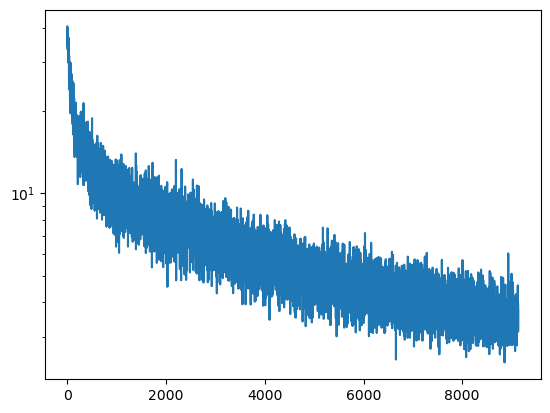

In [81]:
loss_copy = loss.copy()
plt.plot(torch.tensor(loss_copy).detach().numpy())
plt.yscale('log')


In [82]:
#calculate loss on entire dataset
emb = C[X]
h = torch.tanh(emb.view(-1, block_size*embedding_dim) @ W1 + b1)
logits = h @ W2 + b2
total_loss = F.cross_entropy(logits, Y)
total_loss.data

#We should really be splitting the data into train and test, but we are lazy


tensor(3.5249)

In [85]:
#sample from the model

for i in range(10):
    context = [0] * block_size
    name = []
    for i in range(20):
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(-1, block_size*embedding_dim) @ W1 + b1)
        logits = h @ W2 + b2
        prob = F.softmax(logits, dim=1)
        ix = torch.multinomial(prob, 1).item()
        if ix == 0:
            break
        name.append(itos[ix])
        context = context[1:] + [ix]
    print(''.join(name))

        

        

lrllerl
duoyana
lahmyslah
chaii
svbonah
rinxhen
lrar
jarim
jonesiee
meluni


In [87]:
X.shape
#now we will generate 228146 names and save them to a text file 

with open('generated_names.txt', 'w') as f:
    for i in range(32033):
        context = [0] * block_size
        name = []
        for i in range(20):
            emb = C[torch.tensor(context)]
            h = torch.tanh(emb.view(-1, block_size*embedding_dim) @ W1 + b1)
            logits = h @ W2 + b2
            prob = F.softmax(logits, dim=1)
            ix = torch.multinomial(prob, 1).item()
            if ix == 0:
                break
            name.append(itos[ix])
            context = context[1:] + [ix]
        f.write(''.join(name)+'\n')
        if i % 10000 == 0:
            print(i)